In [ ]:
#QUESTION 1 : 
 Analyze the 'sulphates' and 'residual sugar' features between red and white wines.
Identify outliers and represent them using appropriate boxplots and basic statistics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , precision_score, recall_score 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from imblearn.over_sampling import SMOTE

In [3]:
white_wine_path = "C:\\Users\\raksha\\Downloads\\winequality-white (1).csv"
red_wine_path = "C:\\Users\\raksha\\Downloads\\winequality_red.csv"

In [5]:
Redwine = pd.read_csv("C:\\Users\\raksha\\Downloads\\winequality_red.csv")
Redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
Whitewine = pd.read_csv("C:\\Users\\raksha\\Downloads\\winequality-white (1).csv")
Whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
Whitewine['type'] = 'White'
Redwine['type'] = 'Red'

In [11]:
wine_data = pd.concat([Whitewine, Redwine], axis=0)

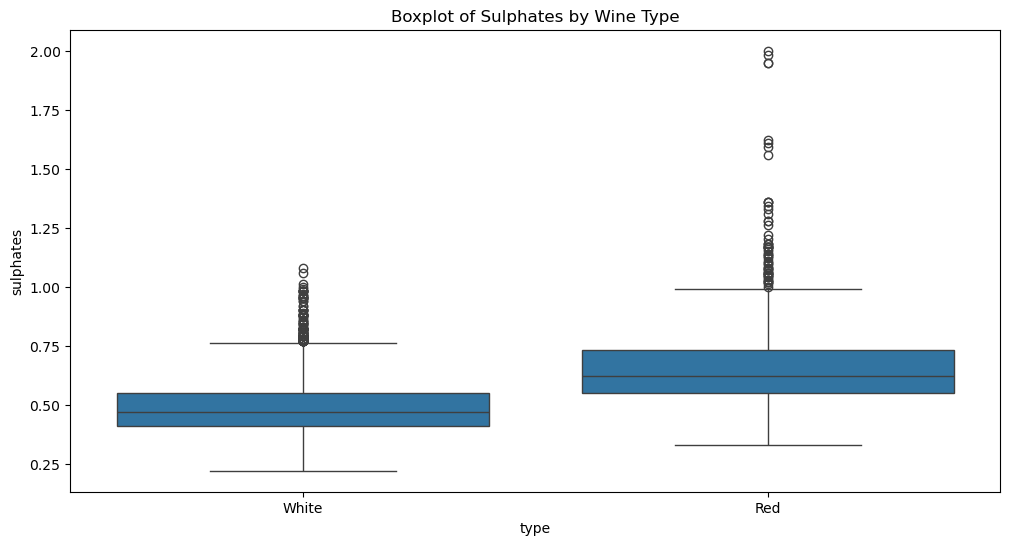

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='sulphates', data=wine_data)
plt.title('Boxplot of Sulphates by Wine Type')
plt.show()

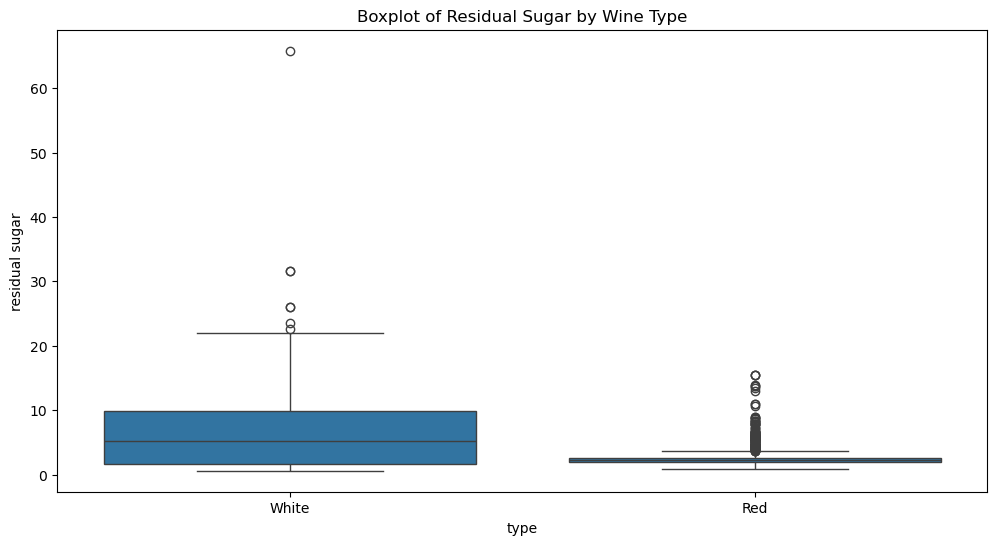

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='residual sugar', data=wine_data)
plt.title('Boxplot of Residual Sugar by Wine Type')
plt.show()

In [17]:
sulphates_stats = wine_data.groupby('type')['sulphates'].describe()
residual_sugar_stats = wine_data.groupby('type')['residual sugar'].describe()

print("Sulphates Statistics:")
print(sulphates_stats)

print("\nResidual Sugar Statistics:")
print(residual_sugar_stats)

Sulphates Statistics:
        count      mean       std   min   25%   50%   75%   max
type                                                           
Red    1599.0  0.658149  0.169507  0.33  0.55  0.62  0.73  2.00
White  4898.0  0.489847  0.114126  0.22  0.41  0.47  0.55  1.08

Residual Sugar Statistics:
        count      mean       std  min  25%  50%  75%   max
type                                                       
Red    1599.0  2.538806  1.409928  0.9  1.9  2.2  2.6  15.5
White  4898.0  6.391415  5.072058  0.6  1.7  5.2  9.9  65.8


In [ ]:
#QUESTION 2 :
Display the frequency of low, medium, and high-quality wines for both red and white wines using a grouped bar chart.


In [19]:
def categorize_quality(quality):
    if quality <= 4:
        return 'Low'
    elif 5 <= quality <= 6:
        return 'Medium'
    else:
        return 'High'

wine_data['quality_category'] = wine_data['quality'].apply(categorize_quality)

In [21]:
quality_counts = wine_data.groupby(['type', 'quality_category']).size().reset_index(name='count')

In [23]:
pivot_quality_counts = quality_counts.pivot(index='quality_category', columns='type', values='count')

<Axes: xlabel='quality_category'>

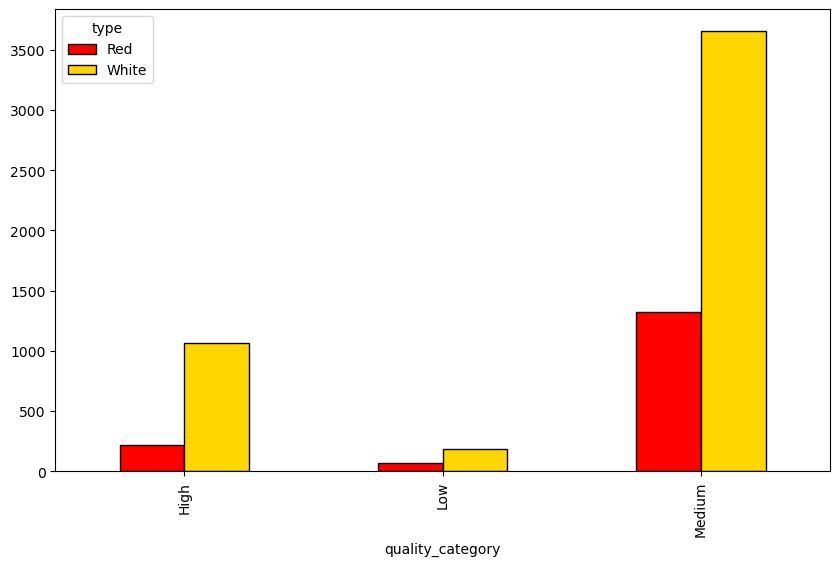

In [25]:
pivot_quality_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'gold'], edgecolor='black')

In [27]:
quality_counts = wine_data.groupby(['type', 'quality_category']).size().reset_index(name='count')

In [29]:
print("\nGrouped Quality Counts:")
print(quality_counts)


Grouped Quality Counts:
    type quality_category  count
0    Red             High    217
1    Red              Low     63
2    Red           Medium   1319
3  White             High   1060
4  White              Low    183
5  White           Medium   3655


In [31]:
pivot_quality_counts = quality_counts.pivot(index='quality_category', columns='type', values='count')

In [33]:
print("\nPivot Table for Plotting:")
print(pivot_quality_counts)


Pivot Table for Plotting:
type               Red  White
quality_category             
High               217   1060
Low                 63    183
Medium            1319   3655


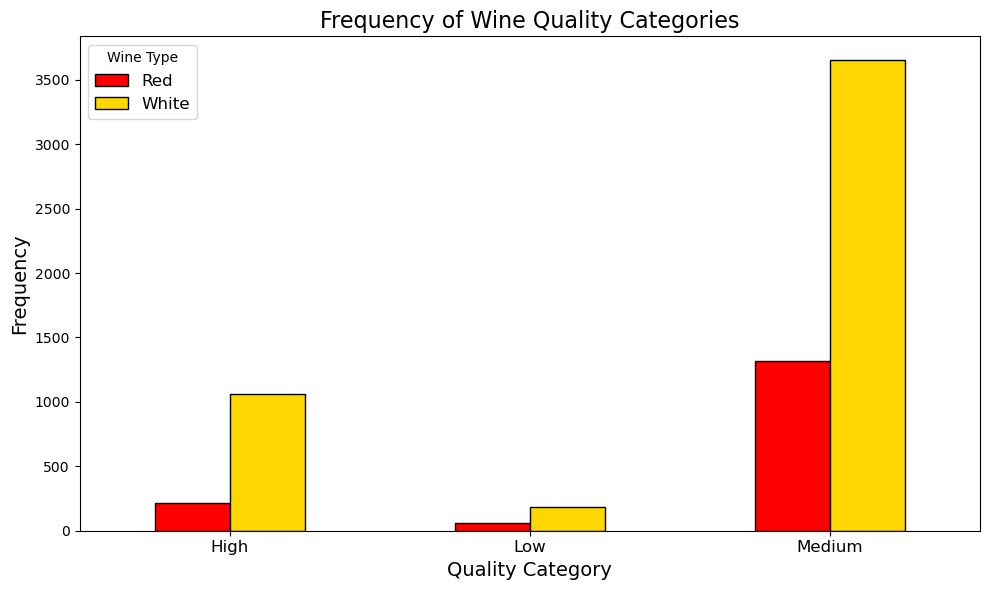

In [35]:
if not pivot_quality_counts.empty:
    pivot_quality_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'gold'], edgecolor='black')

    
    plt.title('Frequency of Wine Quality Categories', fontsize=16)
    plt.xlabel('Quality Category', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.legend(title='Wine Type', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
#QUESTION 3 :  
Standardize the 'citric acid' and 'total sulfur dioxide' features and display their standardized values.


In [37]:
features_to_standardize = ['citric acid', 'total sulfur dioxide']

In [39]:
scaler = StandardScaler()

In [41]:

wine_data_standardized = wine_data.copy()
wine_data_standardized[features_to_standardize] = scaler.fit_transform(wine_data[features_to_standardize])

In [43]:
print("Standardized values for 'citric acid' and 'total sulfur dioxide':")
print(wine_data_standardized[features_to_standardize].head())

Standardized values for 'citric acid' and 'total sulfur dioxide':
   citric acid  total sulfur dioxide
0     0.284686              0.959976
1     0.147046              0.287618
2     0.559966             -0.331660
3     0.009406              1.243074
4     0.009406              1.243074


In [ ]:
#QUESTION 4 :
Use a decision tree classifier to classify wine quality into low, medium, and high categories. Exclude the features
'density', 'sulphates', and 'residual sugar' from the analysis. Evaluate the model's performance on the test set.
Then, apply SMOTE to balance the classes and include all features in the analysis. Compare the test set accuracy before and after SMOTE.



In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [47]:
# Load datasets
white_wine_path = "C:\\Users\\raksha\\Downloads\\winequality-white (1).csv"
red_wine_path = "C:\\Users\\raksha\\Downloads\\winequality_red.csv"

In [49]:
Redwine = pd.read_csv("C:\\Users\\raksha\\Downloads\\winequality_red.csv")
Redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
Whitewine = pd.read_csv("C:\\Users\\raksha\\Downloads\\winequality-white (1).csv")
Whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [53]:
Whitewine['type'] = 'White'
Redwine['type'] = 'Red'

In [55]:
wine_data = pd.concat([Whitewine, Redwine], axis=0)

In [57]:
# Categorize wine quality into 'low', 'medium', 'high'
wine_data['quality_category'] = pd.cut(
    wine_data['quality'], 
    bins=[0, 5, 6, 10], 
    labels=['low', 'medium', 'high']
)

In [61]:
# Define features and labels, excluding specified features
excluded_features = ['density', 'sulphates', 'residual sugar', 'quality', 'quality_category', 'type']
X = wine_data.drop(columns=excluded_features)
y = wine_data['quality_category']


In [63]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [67]:
# Evaluate on test set
y_pred = clf.predict(X_test)
accuracy_before_smote = accuracy_score(y_test, y_pred)
report_before_smote = classification_report(y_test, y_pred)


In [69]:
print("Accuracy before SMOTE:", accuracy_before_smote)
print("Classification Report before SMOTE:\n", report_before_smote)


Accuracy before SMOTE: 0.6492307692307693
Classification Report before SMOTE:
               precision    recall  f1-score   support

        high       0.59      0.60      0.59       256
         low       0.70      0.68      0.69       477
      medium       0.63      0.65      0.64       567

    accuracy                           0.65      1300
   macro avg       0.64      0.64      0.64      1300
weighted avg       0.65      0.65      0.65      1300



In [71]:
#Apply SMOTE to balance classes:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [73]:
# Split the balanced dataset
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

In [75]:
clf_balanced = DecisionTreeClassifier(random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [77]:
y_pred_balanced = clf_balanced.predict(X_test_balanced)
accuracy_after_smote = accuracy_score(y_test_balanced, y_pred_balanced)
report_after_smote = classification_report(y_test_balanced, y_pred_balanced)

In [79]:
print("Accuracy after SMOTE:", accuracy_after_smote)
print("Classification Report after SMOTE:\n", report_after_smote)


Accuracy after SMOTE: 0.7038777908343126
Classification Report after SMOTE:
               precision    recall  f1-score   support

        high       0.75      0.78      0.77       567
         low       0.72      0.72      0.72       567
      medium       0.63      0.61      0.62       568

    accuracy                           0.70      1702
   macro avg       0.70      0.70      0.70      1702
weighted avg       0.70      0.70      0.70      1702

